# Seaborn Learning Notes

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 1. Using `relplot()`

**Useful Params**

|Params|Input|Notes|
|-|-|-|
|`x`, `y`, `data`|col_names & dataframe|Basic scatter plot for exploring relations
|`hue`|col_name|Encode the plotted points using different color according to the values of a column. Color's intensity is determined by the value. Use bucket if column is continuos feature.
|`style`|col_name|Encode the plotted points using differnet shape according to the values of a column. Can be used jointly with `hue` for double encoding!
|`palette`|str|Colors to use for the different levels of the `hue` variable. Should be something that can be interpreted by :func:`color_palette`, or a dictionary mapping hue levels to matplotlib colors.
|`size`|str|Encode the plotted points using differnet point size according to the values of a column. 
|`sizes`|tuple|Control the size range for the size encoding.
|`kind`|'line', 'scatter'|Plot type. 
|`sort`|bool|Whether to sort x, useful when `kind=line`
|`ci`|None, 'sd'**|When there are multiple obsersation per x value, relplot by default will give 95 ci. set ci='sd' will give the std.
|`estimator`|None, some other function?|When there are multiple obsersation per x value, relplot by default will estimate the distribution of y for each x. Set to `None` to turn it off. Maybe it can also take some customized functions that work on dataframe.

**About Encoding**
- seaborn provide many different encoding strategies: `hue`, `size`, `style`
- when applying the ecod

**NOTE:
- 95% confident Interval is the interval that the mean will be located at for 95% of the time. 
    - CI: $\bar x \pm t_{0.05, n}\frac{s}{\sqrt n}$
- Standard Deviation is a measurement of the spread of the data. $pm$ 2 std is just 95% of the data lies in.

In [31]:
# some global setting
sns.set(style='darkgrid')
tips = sns.load_dataset('tips')
print(type(tips))
tips

<class 'pandas.core.frame.DataFrame'>


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


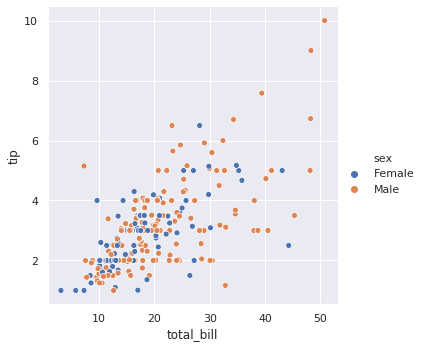

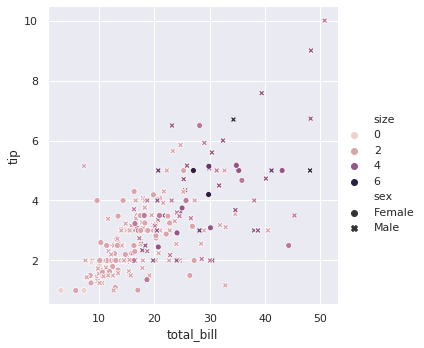

In [32]:
"""
relplot stands for relation plot
- x, y, data for specifying the input data
- hue for color encoding of the data
    - if hue column is numerical, it will adjust the color intensity based on the value
    - if hue column is categorical (str), it will chose two very different color
- style if for shape encoding of the data
"""
sns.relplot(x='total_bill', y='tip', data=tips, hue='sex')
sns.relplot(x='total_bill', y='tip', data=tips, hue='size', style='sex')

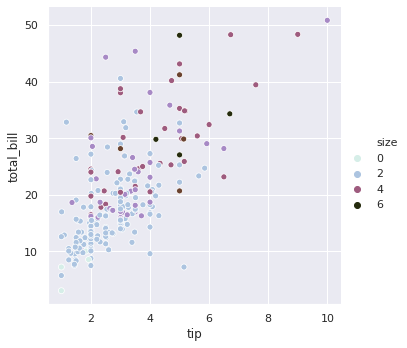

In [150]:
# use the palette can help you change the color
# how it work is kind of a mystery
# but 
sns.relplot(x='tip', y='total_bill', data=tips, hue='size', palette='ch:8, r=-1, l=0.9')

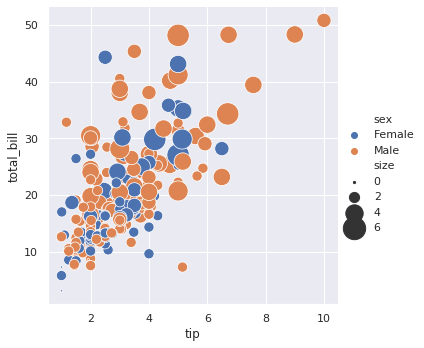

In [149]:
# ecode points with different size by values from a column
# use sizes to control the range of the size
sns.relplot(x='tip', y='total_bill', data=tips, hue='sex', size='size', sizes=(5, 500))

In [121]:
# create a random cumsum
indexes = np.arange(0, 500)
np.random.shuffle(indexes)  # inplace
times = np.arange(0, 500)
values = np.random.randn(500).cumsum()
df = pd.DataFrame({'time': times[indexes], 'val': values[indexes]})
df

,time,val
0,289,-2.109234
1,405,1.398301
2,5,-0.424913
3,333,-13.229590
4,98,5.199593
...,...,...
495,128,6.124648
496,229,3.769742
497,177,5.976813
498,361,-8.050604


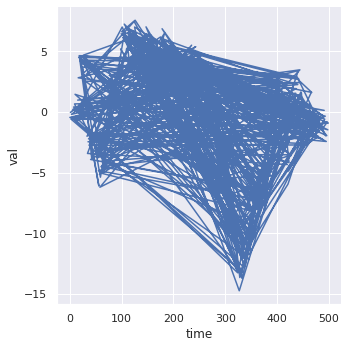

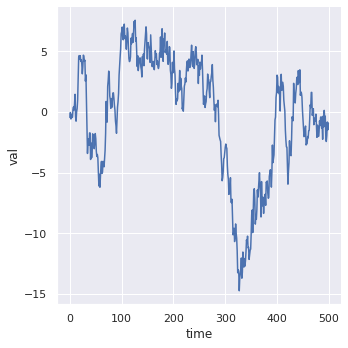

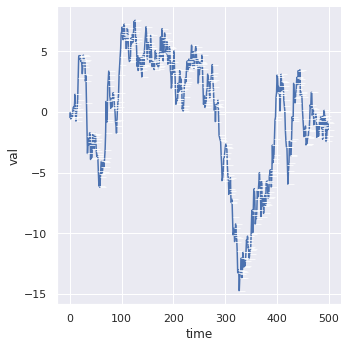

In [146]:
# use relplot to plot into line, sort will sort by x
sns.relplot(x='time', y='val', kind='line', data=df, sort=False)
sns.relplot(x='time', y='val', kind='line', data=df, sort=True)
# line with marker
sns.relplot(x='time', y='val', kind='line', marker=True, data=df, sort=True)

In [131]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


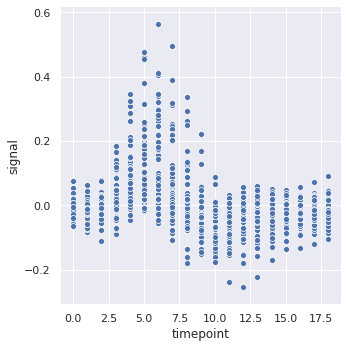

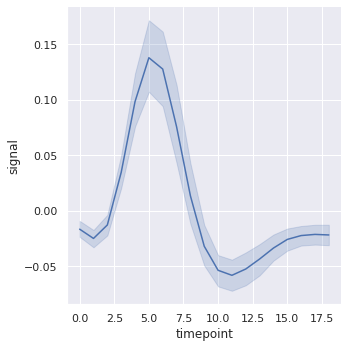

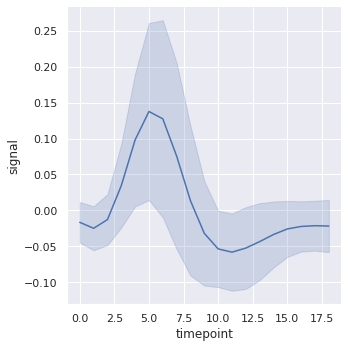

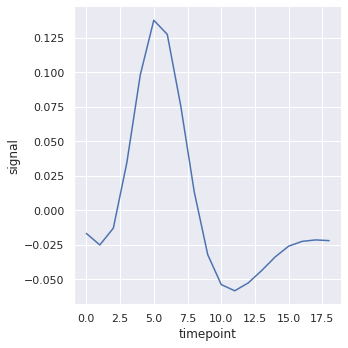

In [152]:
# When there are more than one value corresponeded to each x
# relplot will estimate the distrubution pf y for each x 
# relplot will automatically compute the 95% interval for it when chosing line plot!
# if turn off the ci, then it will plot the mean values for each x and make a line plot!
sns.relplot(x='timepoint', y='signal', data=fmri)
sns.relplot(x='timepoint', y='signal', data=fmri, kind='line')  # by deafult using ci
sns.relplot(x='timepoint', y='signal', data=fmri, kind='line', ci='sd')  # use 2 std, data spread
sns.relplot(x='timepoint', y='signal', data=fmri, kind='line', ci=None)

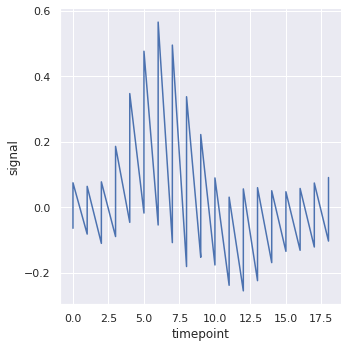

In [159]:
# we can turn off the estimator and just plot the line that link all the data points
sns.relplot(x='timepoint', y='signal', data=fmri, kind='line', estimator=None)